In [1]:
# Env
import os
from dotenv import load_dotenv
if not load_dotenv() or 'HOPSWORKS_API_KEY' not in os.environ:
    print("Please provide a .env file add HOPSWORKS_API_KEY to it.")
    exit(1)

# Imports
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
import hopsworks
import pandas as pd

In [2]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/201877
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
# Check iris dataset
iris_df = pd.read_csv("https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
iris_stats_df = iris_df.describe(percentiles=[0.25, 0.50, 0.90], include="all").transpose()
iris_stats_df

,count,unique,top,freq,mean,std,min,25%,50%,90%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.9,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.61,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.8,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,2.2,2.5
variety,150,3,Setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# expect(suite, "sepal_length", 4.5, 8.0)
# expect(suite, "sepal_width", 2.1, 4.5)
# expect(suite, "petal_length", 1.2, 7)
# expect(suite, "petal_width", 0.2, 2.5)

for feature in list(iris_df.columns[:-1]):
    print(f"{feature}: {iris_stats_df['min'][feature]}, {iris_stats_df['max'][feature]}")
    
# Not exactly the same...

sepal_length: 4.3, 7.9
sepal_width: 2.0, 4.4
petal_length: 1.0, 6.9
petal_width: 0.1, 2.5


In [7]:
iris_df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)  our Iris Data

Let's look at our iris flower - the distribution and range of values for the 4 different features
 * sepal_length
 * sepal_width
 * petal_length
 * petal_width
 
 and the target variable is `variety`.

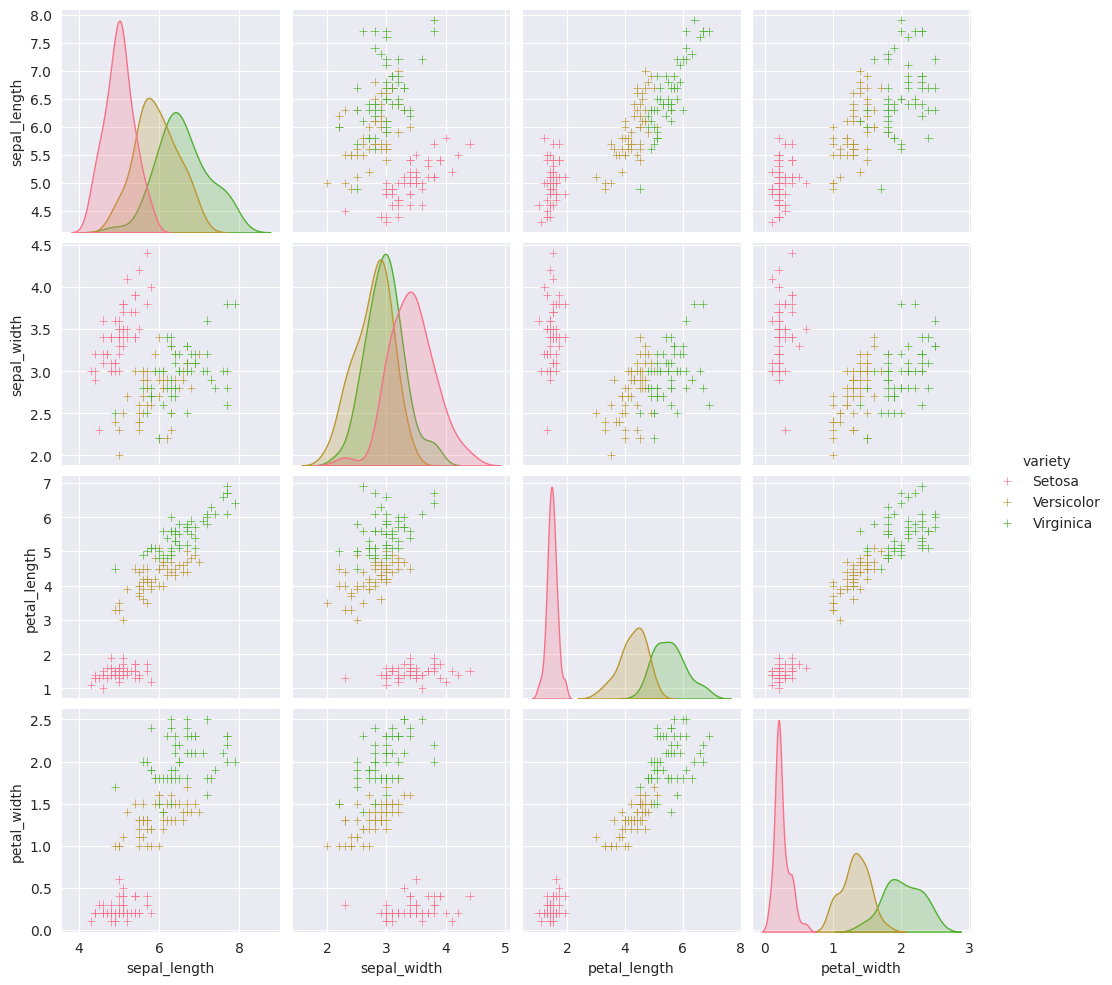

In [8]:
g = sns.pairplot(iris_df, hue='variety', markers='+')
plt.show()

### Visualize range of values 

We want to design a simulator generate the 3 types of iris flower (setosa, versicolor, virginica).
To do this, we can visualize the range of values for the length and width of the sepal and petal for each of the 3 flowers.

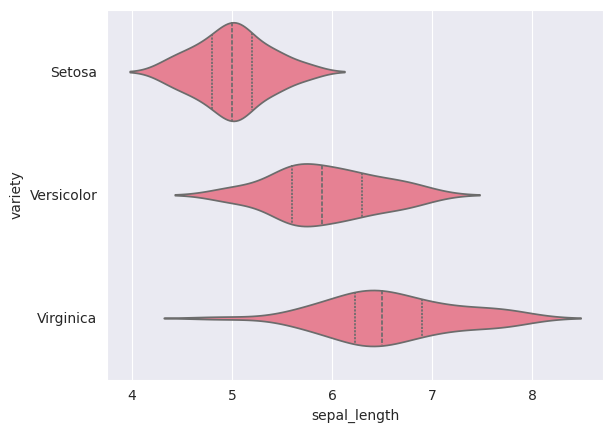

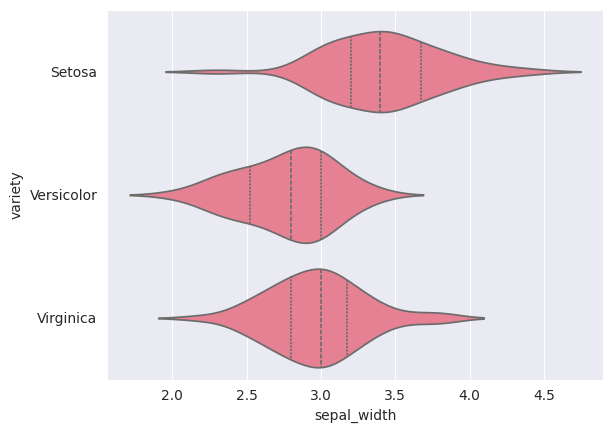

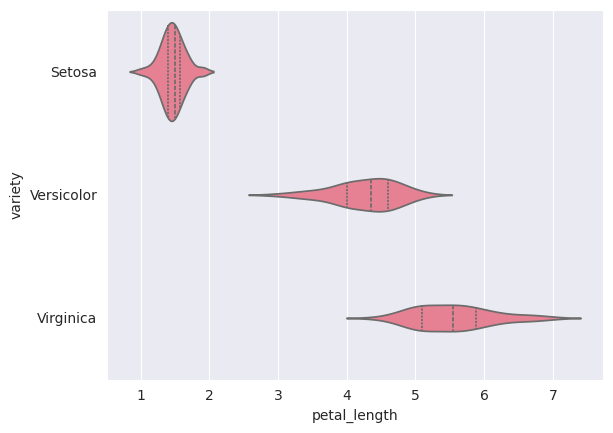

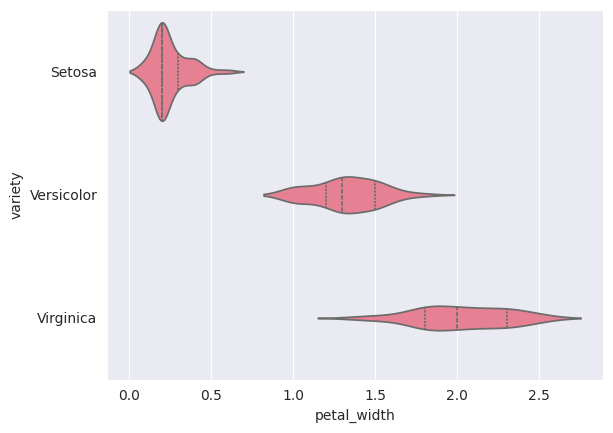

In [9]:
g = sns.violinplot(y='variety', x='sepal_length', data=iris_df, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='sepal_width', data=iris_df, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal_length', data=iris_df, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal_width', data=iris_df, inner='quartile')
plt.show()

### Insert our Iris DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [10]:
iris_fg = fs.get_or_create_feature_group(
    name="iris",
    version=1,
    primary_key=["sepal_length","sepal_width","petal_length","petal_width"], 
    description="Iris flower dataset")
iris_fg.insert(iris_df)

2023-11-13 08:14:49,176 INFO: 	4 expectation(s) included in expectation_suite.
Validation failed.
Validation Report saved successfully, explore a summary at https://c.app.hopsworks.ai:443/p/201877/fs/201796/fg/208243


(None,
 {
   "meta": {
     "great_expectations_version": "0.14.13",
     "expectation_suite_name": "iris_dimensions",
     "run_id": {
       "run_name": null,
       "run_time": "2023-11-13T07:14:49.175673+00:00"
     },
     "batch_kwargs": {
       "ge_batch_id": "54eae6c8-81f4-11ee-8e53-b42e993286f2"
     },
     "batch_markers": {},
     "batch_parameters": {},
     "validation_time": "20231113T071449.175598Z",
     "expectation_suite_meta": {
       "great_expectations_version": "0.14.13"
     }
   },
   "success": false,
   "results": [
     {
       "meta": {
         "ingestionResult": "REJECTED",
         "validationTime": "2023-11-13T07:14:49.000175Z"
       },
       "success": false,
       "result": {
         "element_count": 150,
         "missing_count": 0,
         "missing_percent": 0.0,
         "unexpected_count": 2,
         "unexpected_percent": 1.3333333333333335,
         "unexpected_percent_total": 1.3333333333333335,
         "unexpected_percent_nonmissing":

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.

In [11]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [12]:
suite = ExpectationSuite(expectation_suite_name="iris_dimensions")
expect(suite, "sepal_length", 4.5, 8.0)
expect(suite, "sepal_width", 2.1, 4.5)
expect(suite, "petal_length", 1.2, 7)
expect(suite, "petal_width", 0.2, 2.5)
iris_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")

RestAPIError: Metadata operation error: (url: https://c.app.hopsworks.ai/hopsworks-api/api/project/201877/featurestores/201796/featuregroups/208243/expectationsuite). Server response: 
HTTP code: 409, HTTP reason: Conflict, body: b'{"errorCode":270208,"errorMsg":"An expectation suite is already attached to this feature group. Either update the existing suite via the update endpoint or delete it first."}', error code: 270208, error msg: An expectation suite is already attached to this feature group. Either update the existing suite via the update endpoint or delete it first., user msg: 